# This is a Project that shows correlation using Python

In [17]:
# Importing Libraries

import numpy as np
import pandas as pd

import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure


%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12, 8)  # Adjusts the figsize of the graphs


# Reading in the data

df = pd.read_csv('movies.csv')

In [3]:
# Optional 
# Removing the limit of rows shown in the Jupyter notebook
pd.set_option('display.max_rows', None)

## Looking at the Data

In [4]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [6]:
df.describe()

,year,score,votes,budget,gross,runtime
count,7668.000000,7665.000000,7.665000e+03,5.497000e+03,7.479000e+03,7664.000000
mean,2000.405451,6.390411,8.810850e+04,3.558988e+07,7.850054e+07,107.261613
std,11.153508,0.968842,1.633238e+05,4.145730e+07,1.657251e+08,18.581247
min,1980.000000,1.900000,7.000000e+00,3.000000e+03,3.090000e+02,55.000000
25%,1991.000000,5.800000,9.100000e+03,1.000000e+07,4.532056e+06,95.000000
50%,2000.000000,6.500000,3.300000e+04,2.050000e+07,2.020576e+07,104.000000
75%,2010.000000,7.100000,9.300000e+04,4.500000e+07,7.601669e+07,116.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,366.000000


## Nulls and Missing Data 

We can distinguish there are a few null values in some columns but in the budget field we have more than 2100 values that are null. We need to clean those values/rows.

In [7]:
for col in df.columns:
    missing_values = df[col].isna().sum()
    print(f'{col}: {missing_values}')

name: 0
rating: 77
genre: 0
year: 0
released: 2
score: 3
votes: 3
director: 0
writer: 3
star: 1
country: 3
budget: 2171
gross: 189
company: 17
runtime: 4


In [8]:
# Data Types of our DataSet

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [9]:
# Droping the N/A Values.

df.dropna(how = 'any', axis = 0, inplace = True)

In [10]:
# Clearing the data types

df['budget'] = df['budget'].astype('int64')

df['gross'] = df['gross'].astype('int64')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5421 entries, 0 to 7652
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      5421 non-null   object 
 1   rating    5421 non-null   object 
 2   genre     5421 non-null   object 
 3   year      5421 non-null   int64  
 4   released  5421 non-null   object 
 5   score     5421 non-null   float64
 6   votes     5421 non-null   float64
 7   director  5421 non-null   object 
 8   writer    5421 non-null   object 
 9   star      5421 non-null   object 
 10  country   5421 non-null   object 
 11  budget    5421 non-null   int64  
 12  gross     5421 non-null   int64  
 13  company   5421 non-null   object 
 14  runtime   5421 non-null   float64
dtypes: float64(3), int64(3), object(9)
memory usage: 677.6+ KB


In [12]:
# Extracts the Correct Year from the released column

def extract_year(string):
    # Finds the year with string manipulation
    year = string.split(' ')[2:3]
    return ''.join(year)

# Creation of the correctYear Column

df['yearcorrect'] = df['released'].astype(str).apply(extract_year)
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980


In [13]:
#Find duplicates by comparing the original with the next df. 

df.nunique() # Counts unique Names

name           5336
rating           10
genre            15
year             41
released       2560
score            72
votes           717
director       2063
writer         3205
star           1845
country          50
budget          398
gross          5418
company        1475
runtime         127
yearcorrect      45
dtype: int64

In [14]:
# Count unique values after removing duplicates

df.drop_duplicates().sort_values(by = ['gross'], ascending=False).nunique()
# There are no differences so there are not duplicates.

name           5336
rating           10
genre            15
year             41
released       2560
score            72
votes           717
director       2063
writer         3205
star           1845
country          50
budget          398
gross          5418
company        1475
runtime         127
yearcorrect      45
dtype: int64

## Discovering Correlations by visualization

We start by guessing that the correaltion may be found. 
We will try to find correlation with the gross every movie makes using the Budget and the company's name.

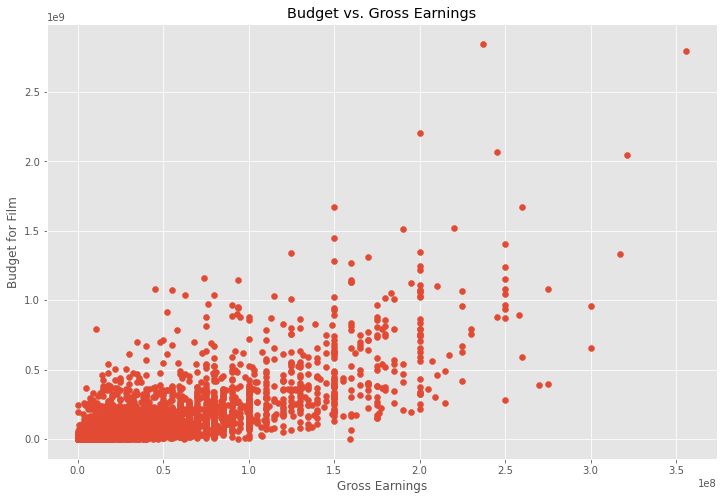

In [19]:
# Scatter plot with budget vs gross

plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs. Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')
plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

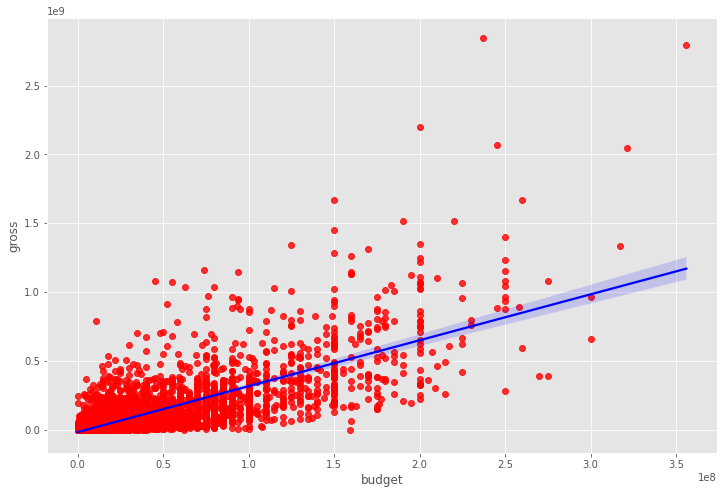

In [22]:
# Plot Budget vs Gross using Seaborn

sns.regplot(x=df['budget'], y=df['gross'], data=df, scatter_kws={"color": "red"}, line_kws={"color": "blue"})

In [23]:
df.corr() 
# Determing correlation with 3 different methods: 1.Pearson, 2.Kendall, 3.Spearman

,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222945,0.329321,0.257486,0.120811
score,0.097995,1.000000,0.409182,0.076254,0.186258,0.399451
votes,0.222945,0.409182,1.000000,0.442429,0.630757,0.309212
budget,0.329321,0.076254,0.442429,1.000000,0.740395,0.320447
gross,0.257486,0.186258,0.630757,0.740395,1.000000,0.245216
runtime,0.120811,0.399451,0.309212,0.320447,0.245216,1.000000


In [35]:
# We will take the average of the three different methods of applying correlation

df_corr = (df.corr(method='kendall') + df.corr(method='spearman') + df.corr(method='pearson')) / 3.0

In [36]:
df_corr

,year,score,votes,budget,gross,runtime
year,1.000000,0.088231,0.341413,0.290259,0.250396,0.120324
score,0.088231,1.000000,0.379145,0.024762,0.132807,0.360973
votes,0.341413,0.379145,1.000000,0.432866,0.640569,0.265870
budget,0.290259,0.024762,0.432866,1.000000,0.648901,0.297434
gross,0.250396,0.132807,0.640569,0.648901,1.000000,0.220131
runtime,0.120324,0.360973,0.265870,0.297434,0.220131,1.000000


### High correlation between 

**We conclude that with the average of Kendall's, Spearman's and Pearson's correlation those are highly correlated:**

1. Year and Votes
2. Score and votes
3. Votes and Gross
4. Budget and Gross
5. Runtime and score





### Visualization of the correlations

In [54]:
# Function to ask the correlation matrix to visualize

def ask_corr():
    
    # Create the visual
    def create_matrix(df_corr):
        sns.heatmap(df_corr, annot=True)
        plt.title("Correlation Matrix for Numeric Data Types")
        plt.xlabel('Movie Features')
        plt.ylabel('Movie Features')
        plt.show()
        # Clear the df_corr 
        df = pd.DataFrame(None)
    
    # Ask the user for the correlation method
    answer = input('Please provide correlation method \n'+
                   'Kendall, Pearson, Spearman or Average (of the three): ')
    
    if answer.lower() == 'kendall':
        print("\n\nKendall's method Selected.\n")
        df_corr = df.corr(method='kendall')
        create_matrix(df_corr)
    elif answer.lower() == 'pearson':
        print("\n\nPearson's method Selected.\n")
        df_corr = df.corr(method='kendall')
        create_matrix(df_corr)
    elif answer.lower() == 'spearman':
        print("\n\nSpearman's method Selected.\n")
        df_corr = df.corr(method='kendall')
        create_matrix(df_corr)
    else:
        print("\n\nThe Average of the three methods Selected.\n")
        df_corr = (df.corr(method='kendall') + df.corr(method='spearman') + df.corr(method='pearson')) / 3.0
        create_matrix(df_corr)

Please provide correlation method 
Kendall, Pearson, Spearman or Average (of the three): spearman


Spearman's method Selected.



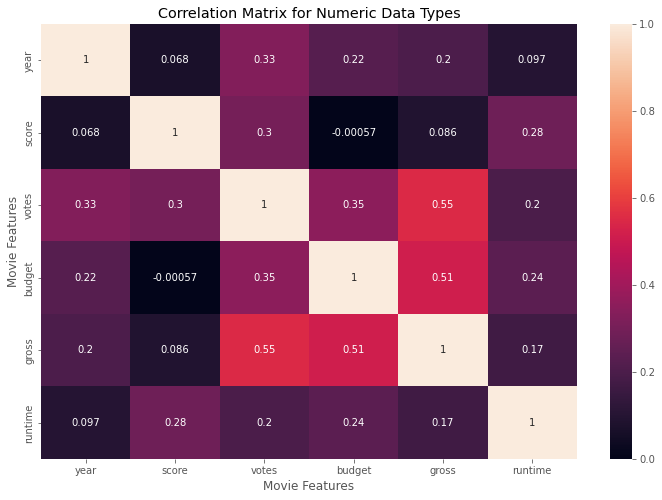

In [55]:
ask_corr()